In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
m1,cov1= [1,5],[[1,0.1],[0.1,1]]
m2,cov2=[4,6],[[1,0.1],[0.1,1.2]]
dist1=np.random.multivariate_normal(m1,cov1,500)
dist2=np.random.multivariate_normal(m2,cov2,500)
print(dist1.shape,dist2.shape)

(500, 2) (500, 2)


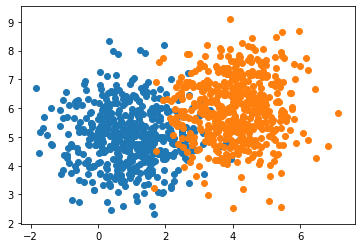

In [0]:
plt.scatter(dist1[:,0],dist1[:,1])
plt.scatter(dist2[:,0],dist2[:,1])

In [0]:
data=np.zeros((1000,3))
data[:500,:2]=dist1
data[500:,:2]=dist2
data[500:,-1]=1
print(data.shape)

(1000, 3)


In [0]:
np.random.shuffle(data)
data[:10]

array([[ 4.81765074,  6.19197587,  1.        ],
       [-0.79181386,  4.73338212,  0.        ],
       [ 1.19408122,  4.38802825,  0.        ],
       [ 3.54276088,  5.18351936,  1.        ],
       [ 4.82429174,  6.49467319,  1.        ],
       [ 2.99516649,  4.58977525,  1.        ],
       [ 4.71973326,  7.70938716,  1.        ],
       [ 0.34846717,  4.67821953,  0.        ],
       [ 3.72864494,  6.89678969,  1.        ],
       [ 0.55841294,  4.59483148,  0.        ]])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(data[:,:2],data[:,-1])
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [0]:
def sigmoid(x):
    return 1.0/(1+np.exp(-1*x))

def hypothesis(X,W,b):
    h=(X*W).sum()+b
    return sigmoid(h)

#Binary Cross-Entropy
def log_likelihood(X,W,b,y_true):
    total=0.0
    m=X.shape[0]
    for i in range(m):
        if y_true[i]==0:
            total+=np.log(1-hypothesis(X[i],W,b))
        else:
            total+=np.log(hypothesis(X[i],W,b))
    total/=m
    return total
    

In [0]:
def gradient_ascent(X,W,b,y_true,learning_rate=0.1):
    gradW=np.zeros(2)
    gradB=0.0
    m=X.shape[0]
    for i in range(m):
        gradW+=(y_true[i]-hypothesis(X[i],W,b))*X[i]
        gradB+=(y_true[i]-hypothesis(X[i],W,b))
    gradW/=m
    gradB/=m
    W+=learning_rate*gradW
    b+=learning_rate*gradB
    logs=log_likelihood(X,W,b,y_true)
    return W,b,logs

In [0]:
W=np.array([0.5,0.5])  #any random value
b=4.2
logs_list=[]
for i in range(400):
    W,b,logs=gradient_ascent(X_train,W,b,y_train,learning_rate=0.1)
    logs_list.append(logs)
print(W)
print(b)

[ 2.24502767 -1.32776593]
1.9979113912022486


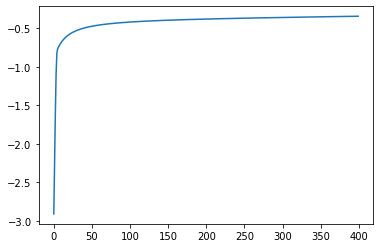

In [0]:
plt.plot(logs_list)
plt.show()

In [0]:
def predict(x_sample,W,b):
    confidence=hypothesis(x_sample,W,b)
    if confidence>0.5:
        return 1
    else:
        return 0

In [0]:
def score(X_test,y_test,W,b):
    preds=[]
    m=X_test.shape[0]
    for i in range(m):
        p=predict(X_test[i],W,b)
        preds.append(p)
    preds=np.asarray(preds)
    return 100*(preds==y_test).sum()/m

In [0]:
score(X_test,y_test,W,b)

88.0

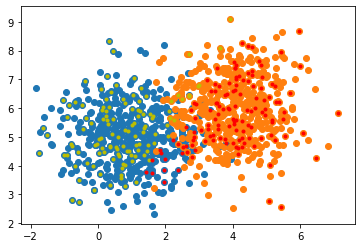

In [0]:
plt.scatter(dist1[:,0],dist1[:,1])
plt.scatter(dist2[:,0],dist2[:,1])
m=X_test.shape[0]
for i in range(m):
    x=X_test[i]
    p=predict(x,W,b)
    if p==0:
        plt.plot(x[0],x[1],'y.')
    else:
         plt.plot(x[0],x[1],'r.')
plt.show()
